# Try to run `excalibuhr` by Yapeng, to do raw data reduction for CD-35 2722 spectrum by CRIRES+.
---
This notebook is a copied and modified version from the [documentation](https://excalibuhr.readthedocs.io/en/latest/getstarted.html), and specialized for multi-targets on slit situation. You can put the notebook anywhere, follow the instructions as below, and modify the input parameters to make it run.

Created by Chenyang Ji in 2025.09.02. Contact: [joanneeeji@gmail.com](mailto:joanneeeji@gmail.com)

## 1. Basic settings
Before running the reduction process, import `excalibuhr` class by defining basic information like night, target/program id, work path, etc.

In [1]:
from excalibuhr import pipeline

import os
pwd = os.getcwd()
pwd

'/home/chenyangji/ESO/data/SupJup/CD-35_2722'

In [2]:
username = 'joanneji' # your ESO username
program_id = '1110.C-4264'  # ESO program ID
workpath = os.path.join(pwd, 'exca_data/')  # the working directory
target = 'CD-35 2722'  # if this program only refers to one target, this can be skipped
night = '2022-12-31'  # the night when observation started
# night = '2023-01-03'
# night = '2023-01-31'

# the class
ppl = pipeline.CriresPipeline(
                              workpath, night=night, obs_mode='nod',
                              num_processes=128, clean_start=False
                             )


Run pipeline for Night: 2022-12-31

Data reduction folder: /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31
Reading header data from header_info.txt
Reading calibration information from calib_info.txt
Reading product information from product_info.txt


## 2. Download files
This step downloads files including SKY, OBJECT, DARK, FLAT, LAMP METROLOGY, your target, standard star, WAVE UNE, and WAVE FPET. You can check the headers of all the files in `header_info.txt`.

You are supposed to provide your usename and password to log into the [ESO archive](https://archive.eso.org/eso/eso_archive_main.html).

- Download the target spectra. This might take several minutes.

In [3]:
# for CD-35 2722
ppl.download_rawdata_eso(login=username, prog_id=program_id, target=target)


-----------------------------------
-----------------------------------

Night: 2022-12-31
prog_id: 1110.C-4264
target: CD-35 2722


INFO: Authenticating joanneji on 'www.eso.org' ... [astroquery.eso.core]
INFO: Authentication successful! [astroquery.eso.core]
Retrieving the following 12 items:
 OB ID      Object       DPR CATG 
------- -------------- -----------
3493323 LAMP,METROLOGY       CALIB
3493323 LAMP,METROLOGY       CALIB
3493323            SKY ACQUISITION
3493323         OBJECT ACQUISITION
3493323     CD-35 2722     SCIENCE
3493323     CD-35 2722     SCIENCE
3493323     CD-35 2722     SCIENCE
3493323     CD-35 2722     SCIENCE
3493323     CD-35 2722     SCIENCE
3493323     CD-35 2722     SCIENCE
3493323     CD-35 2722     SCIENCE
3493323     CD-35 2722     SCIENCE
INFO: Retrieving associated 'raw' calibration files ... [astroquery.eso.core]
INFO: Found 18 associated files [astroquery.eso.core]
INFO: Downloading datasets ... [astroquery.eso.core]
INFO: Downloading 30 files ... [astroquery.eso.core]
INFO: Downloading file 1/30 https://dataportal.eso.org/dataPortal/file/CRIRE.2023-01-01T01:42:48.817 to /home

- Download the standard star spectra (if exist and you know the star's name).

In [5]:
# for chi Tau
standard_star = 'chi Tau'
ppl.download_rawdata_eso(login=username, prog_id=program_id, target=standard_star)


-----------------------------------
-----------------------------------

Night: 2022-12-31
prog_id: 1110.C-4264
target: chi Tau


INFO: Authenticating joanneji on 'www.eso.org' ... [astroquery.eso.core]
INFO: Authentication successful! [astroquery.eso.core]
Retrieving the following 10 items:
 OB ID      Object       DPR CATG 
------- -------------- -----------
3493157 LAMP,METROLOGY       CALIB
3493157 LAMP,METROLOGY       CALIB
3493157 LAMP,METROLOGY       CALIB
3493157 LAMP,METROLOGY       CALIB
3493157 LAMP,METROLOGY       CALIB
3493157         OBJECT ACQUISITION
3493157        chi Tau     SCIENCE
3493157        chi Tau     SCIENCE
3493157        chi Tau     SCIENCE
3493157        chi Tau     SCIENCE
INFO: Retrieving associated 'raw' calibration files ... [astroquery.eso.core]
INFO: Found 18 associated files [astroquery.eso.core]
INFO: Downloading datasets ... [astroquery.eso.core]
INFO: Downloading 28 files ... [astroquery.eso.core]
INFO: Downloading file 1/28 https://dataportal.eso.org/dataPortal/file/CRIRE.2023-01-01T04:21:07.239 to /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data_raw/2022-12-31/raw [a

gzip: *.Z: No such file or directory


## 3. Pre-processing -- combine some calibration files
**This is a combine process for**:
- DARK calibration
- FLAT calibration
- locating trace from master FLAT
- tracing slit curvature in the Fabry-Pérot Etalon (FPET) calibration frame
- flat field normalization, and Blaze function extraction
- treating different observation modes (nodding or starring)
- combining nodding frame

**You will have**:
- `calib_info.txt`: all the calibration files you produced in this step
- `product_info.txt`: the combined spectra (A-B and B-A, labelled NOD_COMBINED), and the frames (labelled NOD_FRAME)

**Common errors**:
- wrong nodding position: not following ABBA sequence --> Check the original data base and delete those frames that are not in pair with neightboring frames. Do not use them.

In [3]:
ppl.preprocessing(combine_mode='mean')


------------------------------
Extracting Observation details
------------------------------

Extracting header details to `header_info.txt`



------------------
Create DARK_MASTER
------------------

DIT values for DARK: {1.427049, 10.0, 30.0}


 Output files:
DARK_MASTER: cal/DARK_MASTER_DIT1.427049.fits
DARK_RON: cal/DARK_RON_DIT1.427049.fits
DARK_BPM: cal/DARK_BPM_DIT1.427049.fits
DIT 1.4 s -> 1.6% of pixels identified as bad

 Output files:
DARK_MASTER: cal/DARK_MASTER_DIT10.0.fits
DARK_RON: cal/DARK_RON_DIT10.0.fits
DARK_BPM: cal/DARK_BPM_DIT10.0.fits
DIT 10.0 s -> 1.9% of pixels identified as bad

 Output files:
DARK_MASTER: cal/DARK_MASTER_DIT30.0.fits
DARK_RON: cal/DARK_RON_DIT30.0.fits
DARK_BPM: cal/DARK_BPM_DIT30.0.fits
DIT 30.0 s -> 1.8% of pixels identified as bad

 cal_dark runtime: 20.5 s 


------------------
Create FLAT_MASTER
------------------

Wavelength settings for FLAT: {'K2166'}

WLEN setting K2166 -> 1.6% of pixels identified as bad

 Output files:
FLAT_MASTER: cal/FLAT_MASTER_K2166.fits
FLAT_BPM: cal/FLAT_BPM_K2166.fits

 cal_flat_raw runtime: 2.3 s 


---------------------
Trace spectral orders
---

## 4. Spectrum extraction
One of the most important functions when extracting the spectra. Refer to this to see all the arguments that can be modified.
```
ppl.obs_extract(self, caltype='NOD_COMBINED', 
                          object=None,
                          savename='',
                          peak_frac=None, companion_sep=None,
                          remove_star_bkg=False,
                          remove_sky_bkg=False,
                          aper_prim=20, aper_comp=10, 
                          extract_2d=True,
                          extr_level=0.9,
                          debug=False)
```

Here I extract the spectra of the primary (starA) and secondary (starB) seperately, since simply providing a companion seperation does not work. You should do check these things before running the following cell:
- `object`: the object name
- `savename`: choose a name that you want to save as for this target among the object (This matters for my situation -- binary system both on slit)
- `peak_frac`: where the object is located along the cross-order direction in one trace (bottom -- 0 & peak -- 1) --> Perhaps make a plot and estimate it by eye.
- `remove_sky_bkg`: remove the sky background
- `remove_star_bkg`: remove contamination from the primary, e.g. set True when processing the fainter secondary star (also the reason for processing the primary and secondary separately)

In [4]:
ppl.obs_extract(caltype='NOD_COMBINED',
                object='CD-35 2722',
                savename='starA',  # or whatever you want
                peak_frac={'A':0.47, 'B':0.92},
                companion_sep=None,
                remove_sky_bkg=True,
                remove_star_bkg=False,
                debug=False)


---------------
Extract spectra
---------------

Processing target: CD-35 2722 

Output file -> Extr1D_COMBINED_starA: out/combined/Extr1D_PRIMARY_starA_COMBINED_CD-352722_K2166_NOD_B.fits
Output file -> Extr1D_COMBINED_starA: out/combined/Extr1D_PRIMARY_starA_COMBINED_CD-352722_K2166_NOD_A.fits
Output file -> Extr2D_COMBINED_starA: out/combined/Extr2D_PRIMARY_starA_COMBINED_CD-352722_K2166_NOD_B.npz
Output file -> Extr2D_COMBINED_starA: out/combined/Extr2D_PRIMARY_starA_COMBINED_CD-352722_K2166_NOD_A.npz

 obs_extract runtime: 21.5 s 



In [5]:
ppl.obs_extract(caltype='NOD_COMBINED',
                object='CD-35 2722',
                savename='starB',
                peak_frac={'A':0.47-0.28, 'B':0.92-0.28},
                companion_sep=None,
                remove_sky_bkg=True,
                remove_star_bkg=True,
                debug=False)


---------------
Extract spectra
---------------

Processing target: CD-35 2722 

Output file -> Extr1D_COMBINED_starB: out/combined/Extr1D_PRIMARY_starB_COMBINED_CD-352722_K2166_NOD_A.fits
Output file -> Extr1D_COMBINED_starB: out/combined/Extr1D_PRIMARY_starB_COMBINED_CD-352722_K2166_NOD_B.fits
Output file -> Extr2D_COMBINED_starB: out/combined/Extr2D_PRIMARY_starB_COMBINED_CD-352722_K2166_NOD_A.npz
Output file -> Extr2D_COMBINED_starB: out/combined/Extr2D_PRIMARY_starB_COMBINED_CD-352722_K2166_NOD_B.npz

 obs_extract runtime: 24.5 s 



Also do this for the standard star for a comparison.

In [6]:
ppl.obs_extract(caltype='NOD_COMBINED',
                object='chi Tau',
                savename='STD',
                peak_frac={'A':0.27, 'B':0.75},
                companion_sep=None,
                remove_sky_bkg=False,
                remove_star_bkg=False,
                debug=False)


---------------
Extract spectra
---------------

Processing target: chi Tau 

Output file -> Extr1D_COMBINED_STD: out/combined/Extr1D_PRIMARY_STD_COMBINED_chiTau_K2166_NOD_A.fits
Output file -> Extr1D_COMBINED_STD: out/combined/Extr1D_PRIMARY_STD_COMBINED_chiTau_K2166_NOD_B.fits
Output file -> Extr2D_COMBINED_STD: out/combined/Extr2D_PRIMARY_STD_COMBINED_chiTau_K2166_NOD_A.npz
Output file -> Extr2D_COMBINED_STD: out/combined/Extr2D_PRIMARY_STD_COMBINED_chiTau_K2166_NOD_B.npz

 obs_extract runtime: 21.2 s 



The products created are listed in `product_info.txt`, labelled as something like Extr1D_COMBINED_starA, Extr2D_COMBINED_starA, etc.
> If you run the cells several times, remember to delete the repeated lines in `product_info.txt` and `calib_info.txt` to avoid repeated executions. Same for below.


## 5. Wavelength calibration
Use `SkyCalc` to obtain telluric transmission spectrum at the same wavelength range, resolution, airmass and PWV with that when observing the targets. Then use the telluric transmission lines to refine the wavelength.

`savename` is choosed as the high-SNR spectra (or brighter target, e.g. primary star or standard star).

**You will have**:
- `calib_info.txt`: wavelength calibration files (labelled as CAL_WLEN)
- `product_info.txt`: the spectrum transferred from pixel scale to wavelength scale (labelled as SPEC_COMBINED_starA)

In [6]:
# when the data quality of the primary star is not good enough, you can use the standard star to refine the wavelength solution
ppl.refine_wlen_solution(savename='starA', debug=False)
# ppl.refine_wlen_solution(savename='STD', debug=False)



--------------------------
Refine wavelength solution
--------------------------

Calibrating WLEN setting K2166:
Processing Detector 0
Processing Detector 1
Processing Detector 2
CAL_WLEN: cal/WLEN_K2166_CD-35_2722_starA.fits

----------------------
Save extracted spectra
----------------------

Output file -> SPEC_COMBINED_starA: out/combined/SPEC_CD-352722_starA.fits
Saved target CD-35 2722 starA with wavelength coverage {'K2166'};  average S/N ~ 502. 

Output file -> SPEC_COMBINED_starB: out/combined/SPEC_CD-352722_starB.fits
Saved target CD-35 2722 starB with wavelength coverage {'K2166'};  average S/N ~ 30. 

Output file -> SPEC_COMBINED_STD: out/combined/SPEC_chiTau_STD.fits
Saved target chi Tau STD with wavelength coverage {'K2166'};  average S/N ~ 188. 


 refine_wlen_solution runtime: 17.4 s 



Just a quick look of the telluric spectra created by `SkyCalc` with above settings.

Get telluric spectrum with SkyCalc...[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fc06a497400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc06a497d00>]


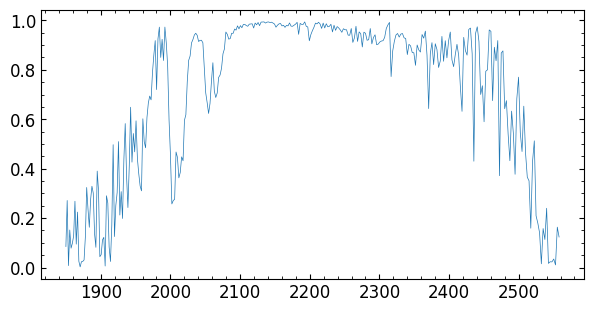

In [9]:
# a test for the skycalc part

import skycalc_ipy
from skycalc_ipy import SkyCalc

# Setup SkyCalc object
sky_calc = SkyCalc()

mjd_start = 59945.08096242
ra_mean = 92.329833
dec_mean = -35.82551

sky_calc.get_almanac_data(
    ra=ra_mean,
    dec=dec_mean,
    date=None,
    mjd=mjd_start,
    observatory="paranal",
    update_values=True,
)


sky_calc["msolflux"] = 130

sky_calc["wmin"] = 1850.0  # (nm)
sky_calc["wmax"] = 2560.0  # (nm)

sky_calc["wgrid_mode"] = "fixed_spectral_resolution"
sky_calc["wres"] = 1e3
sky_calc["pwv"] = 2.5
sky_calc['airmass'] = 1.15

# Get telluric spectra from SkyCalc

print("Get telluric spectrum with SkyCalc...", end="", flush=True)

skycalc_ipy.core.ESOQueryBase.REQUEST_TIMEOUT = 30
wave, trans, _ = sky_calc.get_sky_spectrum(return_type="arrays")

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3.5))
plt.plot(wave, trans)

## 6. Run molecfit
`savename` is choosed as the high-SNR spectra (or brighter target, e.g. primary star or standard star).

**This is really time consuming! Around 30 minutes for each target** (or each frame if you do not want to combine the frames when dealing with time-sensitive spectra series like transmission spectrum).

So I use `multiprocessing` to speed up.

**You will have**:
- `product_info.txt`: telluric templates by molecfit (labelled as TELLU_MOLECFIT)



------------
Run Molecfit
------------


------------
Run Molecfit
------------

BEST_FIT_PARAMETERS.fits not found — running molecfit...
BEST_FIT_PARAMETERS.fits not found — running molecfit...


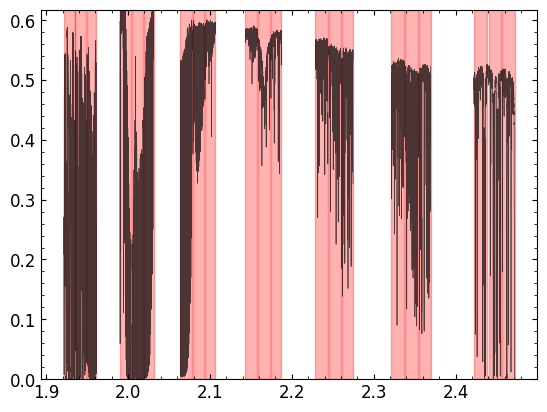

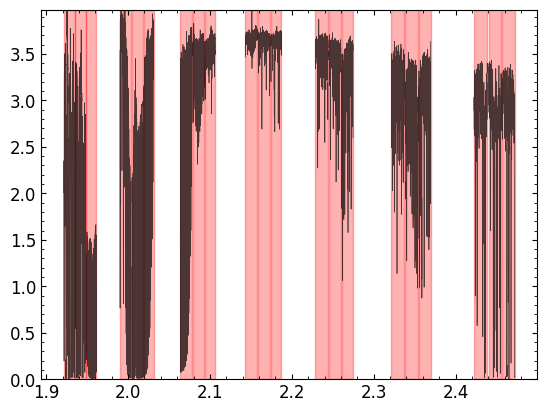



     ***** ESO Recipe Execution Tool, version 3.13.10  *****


     ***** ESO Recipe Execution Tool, version 3.13.10  *****

[ INFO  ] esorex: Creating configuration file '/home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_STD/molecfit_model.rc'

     ***** ESO Recipe Execution Tool, version 3.13.10  *****

[ INFO  ] esorex: Creating configuration file '/home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_starA/molecfit_model.rc'

     ***** ESO Recipe Execution Tool, version 3.13.10  *****

[ INFO  ] molecfit_model: Syntax format for parameter MODEL_MAPPING_KERNEL OK (=NULL)
[ INFO  ] molecfit_model: Syntax format for parameter LIST_MOLEC  OK
[ INFO  ] molecfit_model: Syntax format for parameter FIT_MOLEC  OK
[ INFO  ] molecfit_model: Syntax format for parameter REL_COL  OK
[ INFO  ] molecfit_model: Syntax format for parameter WAVE_INCLUDE OK (=NULL)
[ INFO  ] molecfit_model: Syntax format for parameter WAVE_EXCLUDE OK (=NULL)
[ IN

[ ERROR ] molecfit_model: System Call tar -C /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_STD/telluriccorr_tmp_folder_VLAJv3 -zxf /home/chenyangji/ESO/pipelines/molecfit/4.4.2/pipelines/share/molecfit/data/profiles/gdas/gdas_profiles_C-70.4-24.6.tar.gz C-70.4-24.6D2023-01-01T04.gdas 2>/dev/null failed!
[ ERROR ] molecfit_model: System Call tar -C /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_starA/telluriccorr_tmp_folder_DJK5Ei -zxf /home/chenyangji/ESO/pipelines/molecfit/4.4.2/pipelines/share/molecfit/data/profiles/gdas/gdas_profiles_C-70.4-24.6.tar.gz C-70.4-24.6D2023-01-01T02.gdas 2>/dev/null failed!


[ INFO  ] molecfit_model: (mf_gdas      ) GDAS file : C-70.4-24.6D2023-01-01T04.gdas --> Not found in the tarball
[ INFO  ] molecfit_model: (mf_gdas      ) GDAS file : C-70.4-24.6D2023-01-01T02.gdas --> Not found in the tarball
[ INFO  ] molecfit_model: (mf_gdas      ) GDAS file : C-70.4-24.6D2023-01-01T03.gdas --> Found     in the tarball
[ INFO  ] molecfit_model: (mf_gdas      ) GDAS file : C-70.4-24.6D2023-01-01T01.gdas --> Not found in the tarball


[ ERROR ] molecfit_model: System Call tar -C /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_starA/telluriccorr_tmp_folder_DJK5Ei -zxf /home/chenyangji/ESO/pipelines/molecfit/4.4.2/pipelines/share/molecfit/data/profiles/gdas/gdas_profiles_C-70.4-24.6.tar.gz C-70.4-24.6D2023-01-01T01.gdas 2>/dev/null failed!


[ INFO  ] molecfit_model: (mf_gdas      ) GDAS file : C-70.4-24.6D2023-01-01T05.gdas --> Not found in the tarball
[ INFO  ] molecfit_model: (mf_gdas      ) GDAS file : C-70.4-24.6D2023-01-01T00.gdas --> Found     in the tarball


[ ERROR ] molecfit_model: System Call tar -C /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_STD/telluriccorr_tmp_folder_VLAJv3 -zxf /home/chenyangji/ESO/pipelines/molecfit/4.4.2/pipelines/share/molecfit/data/profiles/gdas/gdas_profiles_C-70.4-24.6.tar.gz C-70.4-24.6D2023-01-01T05.gdas 2>/dev/null failed!


[ INFO  ] molecfit_model: (mf_gdas      ) GDAS file : C-70.4-24.6D2023-01-01T06.gdas --> Found     in the tarball
[ INFO  ] molecfit_model: (mf_gdas      ) Search the GDAS files more closest to the image [C-70.4-24.6D2023-01-01T4.43694] :
[ INFO  ] molecfit_model: (mf_gdas      )   Local ESO GDAS DB [/home/chenyangji/ESO/pipelines/molecfit/4.4.2/pipelines/share/molecfit/data/profiles/gdas/gdas_profiles_C-70.4-24.6.tar.gz]
[ INFO  ] molecfit_model: (mf_gdas      )   1. /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_STD/telluriccorr_tmp_folder_VLAJv3/C-70.4-24.6D2023-01-01T03.gdas
[ INFO  ] molecfit_model: (mf_gdas      )   2. /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_STD/telluriccorr_tmp_folder_VLAJv3/C-70.4-24.6D2023-01-01T06.gdas
[ INFO  ] molecfit_model: (mf_io        ) Load ASCII file: /home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_STD/telluriccorr_tmp_folder_VLAJv3/C-70.4-24.6D2023-01-

In [10]:
# multi-processing
from multiprocessing import Process

def run(name):
    ppl.run_molecfit(savename=name)

procs = []
for target in ["starA", "STD"]:  # put all the targets you want to process here
    p = Process(target=run, args=(target,))
    p.start()
    procs.append(p)

# after all is done...
for p in procs:
    p.join()

A quick look of the best fit parameters. **Change the path to your setting using `ppl.outpath`!**

In [11]:
ppl.outpath

'/home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out'

In [12]:
from astropy.io import fits

file_best_par = './exca_data/2022-12-31/out/molecfit_starA/BEST_FIT_PARAMETERS.fits'
best_params = fits.getdata(file_best_par)

best_params

FITS_rec([('status',  2.00000000e+00, -1.00000000e+00),
          ('fit_params',  9.30000000e+01, -1.00000000e+00),
          ('data_points',  4.30080000e+04, -1.00000000e+00),
          ('positive_weights',  4.25880000e+04, -1.00000000e+00),
          ('valid_pix_frac',  1.00000000e+00, -1.00000000e+00),
          ('iterations',  3.10000000e+01, -1.00000000e+00),
          ('func_eval',  2.49000000e+02, -1.00000000e+00),
          ('lblrtm_calls',  1.78500000e+03, -1.00000000e+00),
          ('initial_chi2',  3.50751843e+09, -1.00000000e+00),
          ('best_chi2',  2.59050543e+07, -1.00000000e+00),
          ('reduced_chi2',  6.08285493e+02, -1.00000000e+00),
          ('rms_rel_to_err',  2.46634445e+01, -1.00000000e+00),
          ('rms_rel_to_mean',  4.65454368e-02, -1.00000000e+00),
          ('boxfwhm',  0.00000000e+00, -1.00000000e+00),
          ('boxfwhm_pix',  0.00000000e+00, -1.00000000e+00),
          ('gaussfwhm',  4.68100837e+00,  1.54314863e-03),
          ('lorentzfwhm

In [ ]:
file_best_par = './exca_data/2022-12-31/out/molecfit_starB/BEST_FIT_PARAMETERS.fits'
best_params = fits.getdata(file_best_par)

best_params

FITS_rec([('status',  1.00000000e+00, -1.        ),
          ('fit_params',  9.30000000e+01, -1.        ),
          ('data_points',  4.30080000e+04, -1.        ),
          ('positive_weights',  4.25880000e+04, -1.        ),
          ('valid_pix_frac',  1.00000000e+00, -1.        ),
          ('iterations',  2.20000000e+01, -1.        ),
          ('func_eval',  2.46000000e+02, -1.        ),
          ('lblrtm_calls',  1.57500000e+03, -1.        ),
          ('initial_chi2',  8.90133354e+10, -1.        ),
          ('best_chi2',  1.81369182e+06, -1.        ),
          ('reduced_chi2',  4.25879217e+01, -1.        ),
          ('rms_rel_to_err',  6.52594221e+00, -1.        ),
          ('rms_rel_to_mean',  3.12289326e-01, -1.        ),
          ('boxfwhm',  0.00000000e+00, -1.        ),
          ('boxfwhm_pix',  0.00000000e+00, -1.        ),
          ('gaussfwhm',  4.47825842e+00,  0.03738765),
          ('lorentzfwhm',  5.00000000e-01, -1.        ),
          ('chip 1, coef 0',  

In [13]:
file_best_par = './exca_data/2022-12-31/out/molecfit_STD/BEST_FIT_PARAMETERS.fits'
best_params = fits.getdata(file_best_par)

best_params

FITS_rec([('status',  1.00000000e+00, -1.00000000e+00),
          ('fit_params',  9.30000000e+01, -1.00000000e+00),
          ('data_points',  4.30080000e+04, -1.00000000e+00),
          ('positive_weights',  4.25880000e+04, -1.00000000e+00),
          ('valid_pix_frac',  1.00000000e+00, -1.00000000e+00),
          ('iterations',  4.10000000e+01, -1.00000000e+00),
          ('func_eval',  3.42000000e+02, -1.00000000e+00),
          ('lblrtm_calls',  1.47000000e+03, -1.00000000e+00),
          ('initial_chi2',  6.39191026e+08, -1.00000000e+00),
          ('best_chi2',  4.05127146e+05, -1.00000000e+00),
          ('reduced_chi2',  9.51292990e+00, -1.00000000e+00),
          ('rms_rel_to_err',  3.08430379e+00, -1.00000000e+00),
          ('rms_rel_to_mean',  1.70018789e-02, -1.00000000e+00),
          ('boxfwhm',  0.00000000e+00, -1.00000000e+00),
          ('boxfwhm_pix',  0.00000000e+00, -1.00000000e+00),
          ('gaussfwhm',  4.85138068e+00,  3.12695709e-03),
          ('lorentzfwhm

Plot the telluric spectra you generated for a quick look.

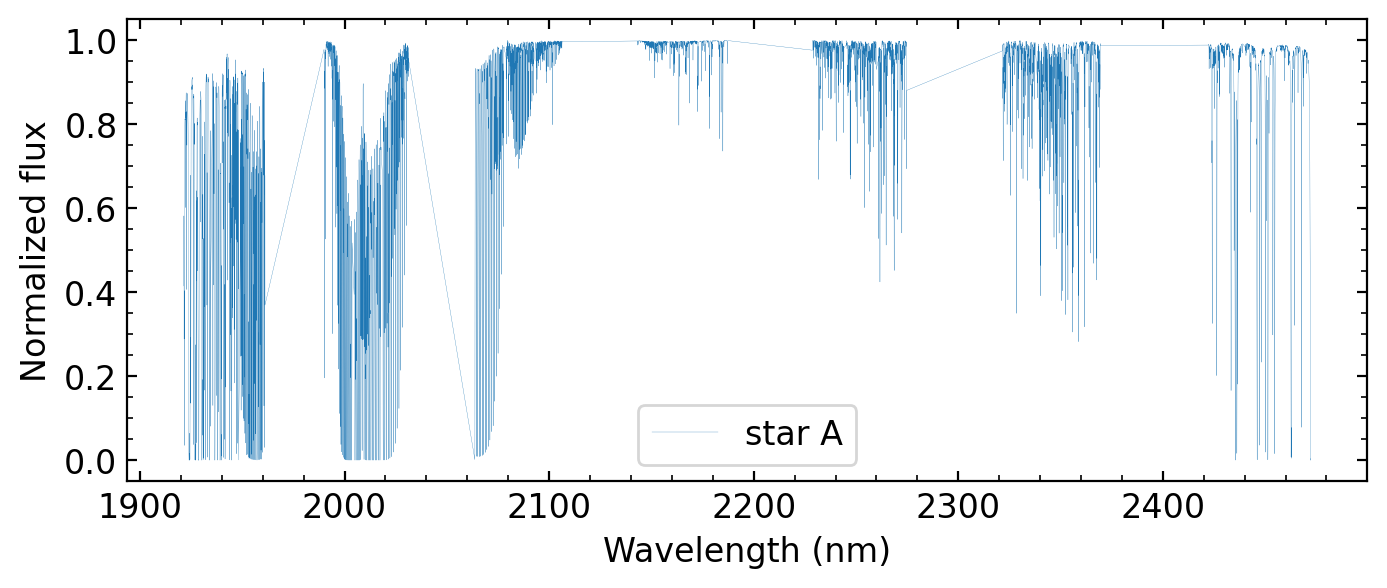

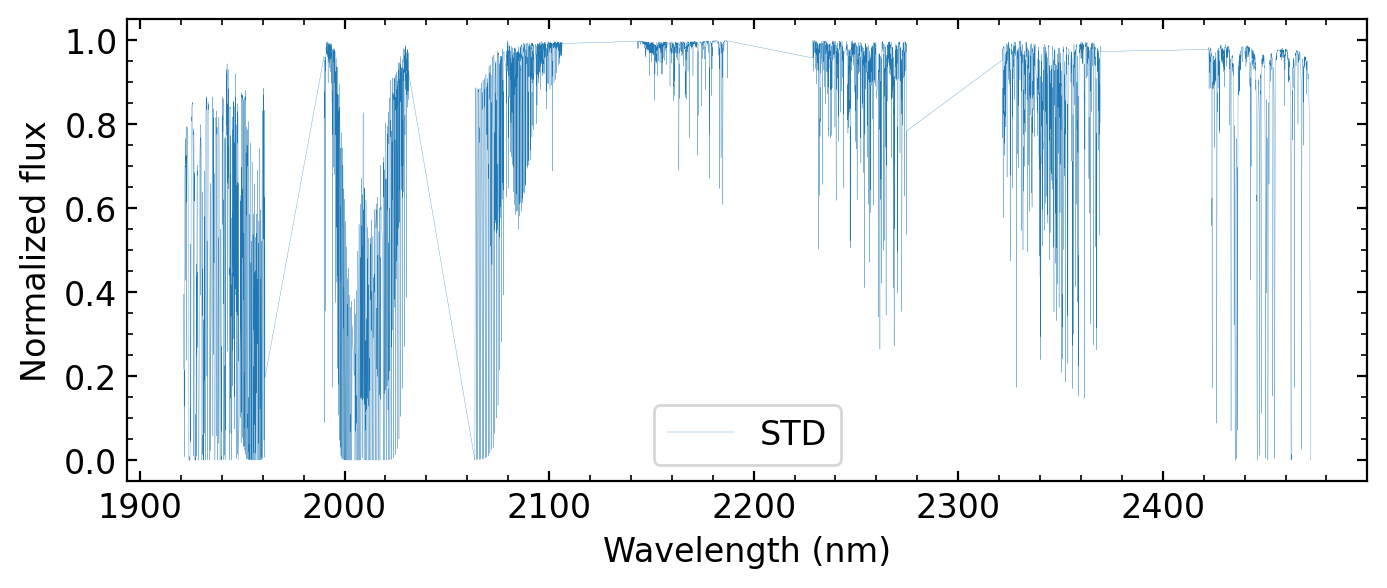

In [15]:
from astropy.io import fits
import matplotlib.pyplot as plt

filepath_starA = os.path.join('/home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_starA', 'TELLURIC_starA.fits')
# filepath_starB = os.path.join('/home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_starB', 'TELLURIC_starB.fits')

filepath_STD = os.path.join('/home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/out/molecfit_STD', 'TELLURIC_STD.fits')

wave_starA, flux_starA = fits.getdata(filepath_starA, ext=1), fits.getdata(filepath_starA, ext=2)
# wave_starB, flux_starB = fits.getdata(filepath_starB, ext=1), fits.getdata(filepath_starB, ext=2)
wave_STD, flux_STD = fits.getdata(filepath_STD, ext=1), fits.getdata(filepath_STD, ext=2)

plt.figure(figsize=(8, 3), dpi=200)
plt.plot(wave_starA, flux_starA, linewidth=0.1, label='star A')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized flux')
plt.legend()

# plt.figure(figsize=(8, 3), dpi=200)
# plt.plot(wave_starB, flux_starB, linewidth=0.1, label='star B')
# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Normalized flux')
# plt.legend()

plt.figure(figsize=(8, 3), dpi=200)
plt.plot(wave_STD, flux_STD, linewidth=0.1, label='STD')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized flux')
plt.legend()

## 7. Calibrating spectral shape using standard star observations.
The instrumental response changes through wavelength. This would be corrected by standard star.

Get basic parameters of the standard star first.

In [16]:
import excalibuhr.utils as su

star = 'chi Tau'
temp, vsini, vsys = su.get_star_properties(star)

print(f"{star}: Teff={temp}K, vsini={vsini}km/s, vsys={vsys}km/s")

chi Tau: Teff=10280K, vsini=225.0km/s, vsys=13.99km/s


In [17]:
ppl.calpath

'/home/chenyangji/ESO/data/SupJup/CD-35_2722/exca_data/2022-12-31/cal'


-----------------
Spectral response
-----------------



/home/chenyangji/ESO/tools/excalibuhr/src/excalibuhr/utils.py:2335: UserWarning: Standard star temperature 10280 K is not a multiple of 200 K - using the closest Phoenix model (10200 K)
  warnings.warn(f"Standard star temperature {temp} K is not a multiple of {modulus} K - using the closest Phoenix model ({int(np.round(temp/modulus)*modulus)} K)")


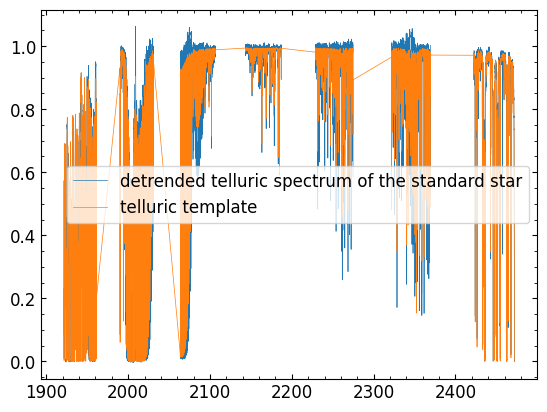

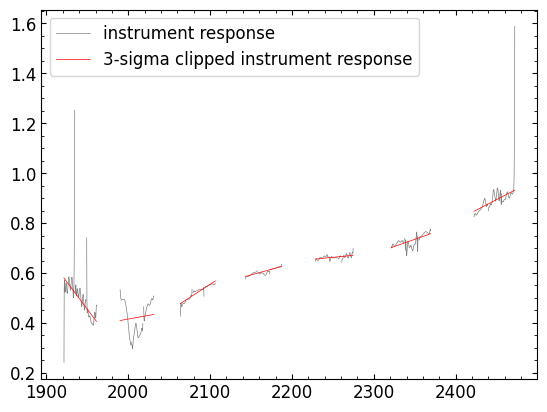


 spec_response_cal runtime: 1.5 s 



In [18]:
ppl.spec_response_cal(star, temp, vsini, vsys, savename='STD', debug=True)

## 8. Apply telluric and instrument response correction.
You can choose to remove telluric lines by using molecfit results, or by standard star. Results and plots are saved in `out/combined` and check them.

In [7]:
# use the telluric model generated by molecfit
ppl.apply_correction(use_molecfit=True)


-----------------
Apply corrections
-----------------



Telluric corrected spectra saved to SPEC_CD-352722_starA1D_TELLURIC_CORR_MOLECFIT.dat
Telluric corrected spectra saved to SPEC_CD-352722_starB1D_TELLURIC_CORR_MOLECFIT.dat
Telluric corrected spectra saved to SPEC_chiTau_STD1D_TELLURIC_CORR_MOLECFIT.dat

 apply_correction runtime: 12.2 s 



In [8]:
# use the standard star
ppl.apply_correction(use_molecfit=False)


-----------------
Apply corrections
-----------------



Telluric corrected spectra saved to SPEC_CD-352722_starA1D_TELLURIC_CORR.dat
Telluric corrected spectra saved to SPEC_CD-352722_starB1D_TELLURIC_CORR.dat
Telluric corrected spectra saved to SPEC_chiTau_STD1D_TELLURIC_CORR.dat

 apply_correction runtime: 12.0 s 



> reference from Yapeng for YSES-1

In [5]:
from excalibuhr import pipeline

    workpath = './'
    night_list = ['2023-02-26']

    for night in night_list:
        ppl = pipeline.CriresPipeline(workpath, night=night, 
                num_processes=1, clean_start=False)

        ppl.preprocessing(combine=True)

        ppl.obs_extract(object='zet CMa', 
                        debug=False)

        ppl.obs_extract(object='YSES 1bc',
                        peak_frac={'A':0.5, 'B':0.95},
                        debug=False)
        ppl.obs_extract(object='YSES 1bc',
                        savename='1b',
                        # extr_level=None,
                        peak_frac={'A':0.3, 'B':0.79}, #26
                        # peak_frac={'A':0.33, 'B':0.83},
                        remove_star_bkg = True,
                        # aper_prim=20,
                        # extract_2d=True,
                        debug=True)

IndentationError: unexpected indent (577452317.py, line 3)